In [2]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import os
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import scipy
from collections import Counter

from cellacdc import cca_functions
from cellacdc import myutils

data_dir = os.path.join('..', 'data', 'paper_plot_data')

# Figure 3

In [11]:
plot_data3b.iloc[plot_data3b['cell_vol_fl'].argmax()]

Position_n         Position_4
Cell_ID                    10
cell_vol_fl       2065.166423
nucleus_vol_fl     283.135286
Name: 35, dtype: object

In [18]:
plot_data3b.sort_values('cell_vol_fl').tail(50)

,Position_n,Cell_ID,cell_vol_fl,nucleus_vol_fl
65,Position_8,6,515.429645,362.713505
368,Position_44,1,515.447842,362.912335
29,Position_4,1,516.485590,260.236990
39,Position_5,3,520.152525,374.683591
91,Position_11,8,520.674319,270.539038
525,Position_80,2,520.824882,315.266413
413,Position_53,1,523.994632,326.416097
302,Position_36,3,524.301148,437.971121
471,Position_65,2,525.030561,403.986245
519,Position_78,4,538.018602,247.794071


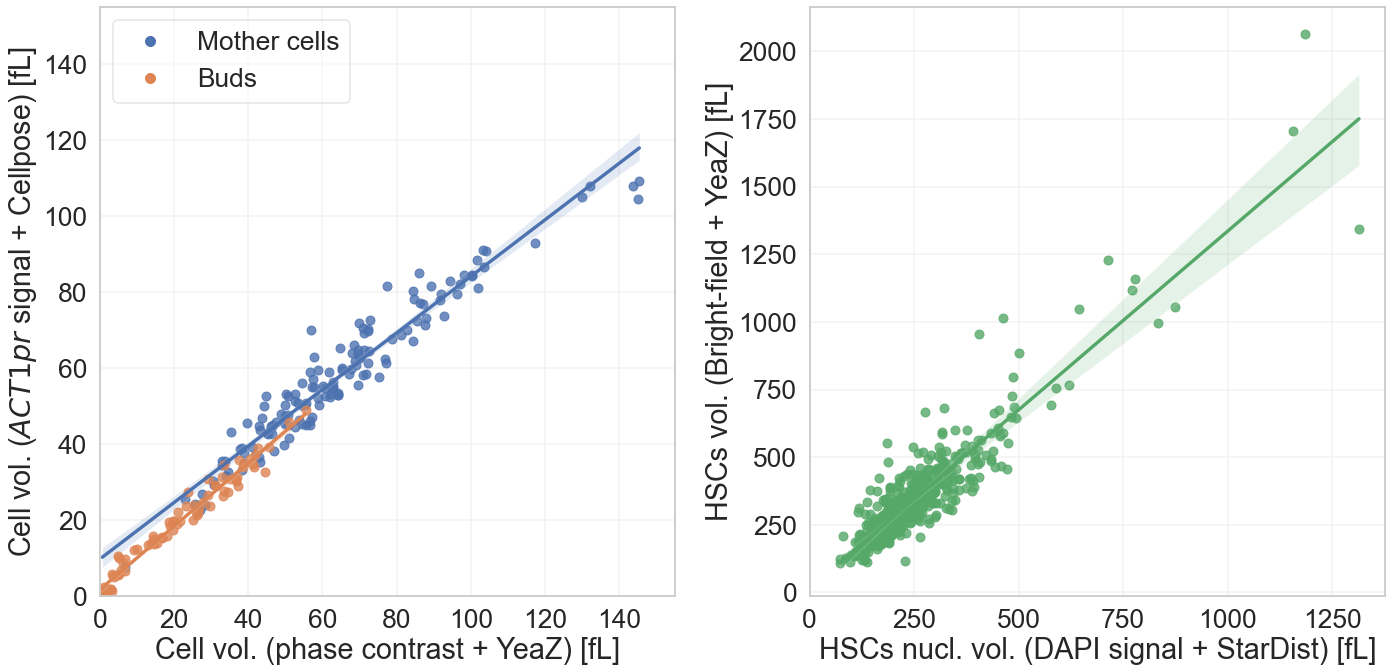

Sample size Fig. 3A: 113
Pearson Correlation and p-value for non-correlation 3A: (0.9831399934935635, 2.788007573955024e-167)
Sample size Fig. 3B: 531
Pearson Correlation and p-value for non-correlation 3A: (0.9145850859997469, 3.784770056289979e-210)


In [16]:
# load data from csv
plot_data3a = pd.read_csv(os.path.join(data_dir, 'plot_data3a.csv'))
plot_data3b = pd.read_csv(os.path.join(data_dir, 'p38_AB_AllPos_BF_manual_cell_vol_VS_nucl_vol.csv'))

# Pixel size for p38 data was 0.1332 which is wrong --> use the correct size = 0.2146
from math import pow
correction_factor = pow(0.2146/0.133200, 3)
plot_data3b['cell_vol_fl'] = plot_data3b['cell_vol_fl']*correction_factor
plot_data3b['nucleus_vol_fl'] = plot_data3b['nucleus_vol_fl']*correction_factor

sns.set_theme(context='talk', font_scale=1.6)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='mother'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = ax[0],
    color = sns.color_palette()[0]
)
sns.regplot(
    data=plot_data3a[plot_data3a.relationship_cellpose=='bud'],
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    ax = ax[0],
    color = sns.color_palette()[1]
)
labels = [
    'Mother cells',
    'Buds'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
ax[0].legend(
    handles=handles,
    labels=labels, 
    loc='upper left',
    framealpha=0.5
)
scatter_plot_max = max(plot_data3a.cell_vol_fl_yeaz.max(), plot_data3a.cell_vol_fl_cellpose.max())
ax[0].set_xlabel('Cell vol. (phase contrast + YeaZ) [fL]')
ax[0].set_ylabel('Cell vol. ($\it{ACT1pr}$ signal + Cellpose) [fL]')
#ax[0].set_title('A', fontsize=50, loc='left', pad=30, x=-0.175)
ax[0].set_ylim(0, int(scatter_plot_max)+10)
ax[0].set_xlim(0, int(scatter_plot_max)+10)
ax[0].set_xticks(np.arange(0, scatter_plot_max+10, 20))
ax[0].set_yticks(np.arange(0, scatter_plot_max+10, 20))

sns.regplot(
    data=plot_data3b,
    x='nucleus_vol_fl',
    y='cell_vol_fl',
    robust=False,
    ax = ax[1],
    color = sns.color_palette()[2]
)

scatter_plot_max = plot_data3b.nucleus_vol_fl.max()
ax[1].set_ylabel('HSCs vol. (Bright-field + YeaZ) [fL]')
ax[1].set_xlabel('HSCs nucl. vol. (DAPI signal + StarDist) [fL]')
ax[1].set_xticks(np.arange(0, scatter_plot_max+10, 250))


plt.tight_layout()
plt.savefig('../figures/new_fig3/fig3_final.svg')
#plt.savefig('../figures/new_fig3/fig3.png', dpi=300)
plt.show()

print(f'Sample size Fig. 3A: {len(plot_data3a)//2}')
pearson_r, p_value = scipy.stats.pearsonr(plot_data3a.cell_vol_fl_yeaz, plot_data3a.cell_vol_fl_cellpose)
print(f'Pearson Correlation and p-value for non-correlation 3A: {pearson_r, p_value}')

print(f'Sample size Fig. 3B: {len(plot_data3b)}')
pearson_r, p_value = scipy.stats.pearsonr(plot_data3b.nucleus_vol_fl, plot_data3b.cell_vol_fl)
print(f'Pearson Correlation and p-value for non-correlation 3A: {pearson_r, p_value}')

# Figure 4

Sample size Fig. 4A&B: 1642
Sample size control Fig. 4B: 417
Sample size XS: 247
Sample size M: 493
Sample size XL: 244
ommitted 0 cells with FITC concentration higher than 4830.422634201878
**Effect sizes FITC amount per volume:**
Effect size (cohen) All vs. Control: 1.29
Effect size (cohen) XS vs. Control: 1.71
Effect size (cohen) M vs. Control: 1.62
Effect size (cohen) XL vs. Control: 1.74
Effect size (glass) All vs. Control: 6.83
Effect size (glass) XS vs. Control: 7.85
Effect size (glass) M vs. Control: 6.75
Effect size (glass) XL vs. Control: 5.88


g:\my drive\01_postdoc_hmgu\python_myscripts\mia\git\cell_acdc\cellacdc\cca_functions.py:476: RuntimeWarning: invalid value encountered in true_divide
  bin_standard_errors = bin_std/np.sqrt(bin_counts)


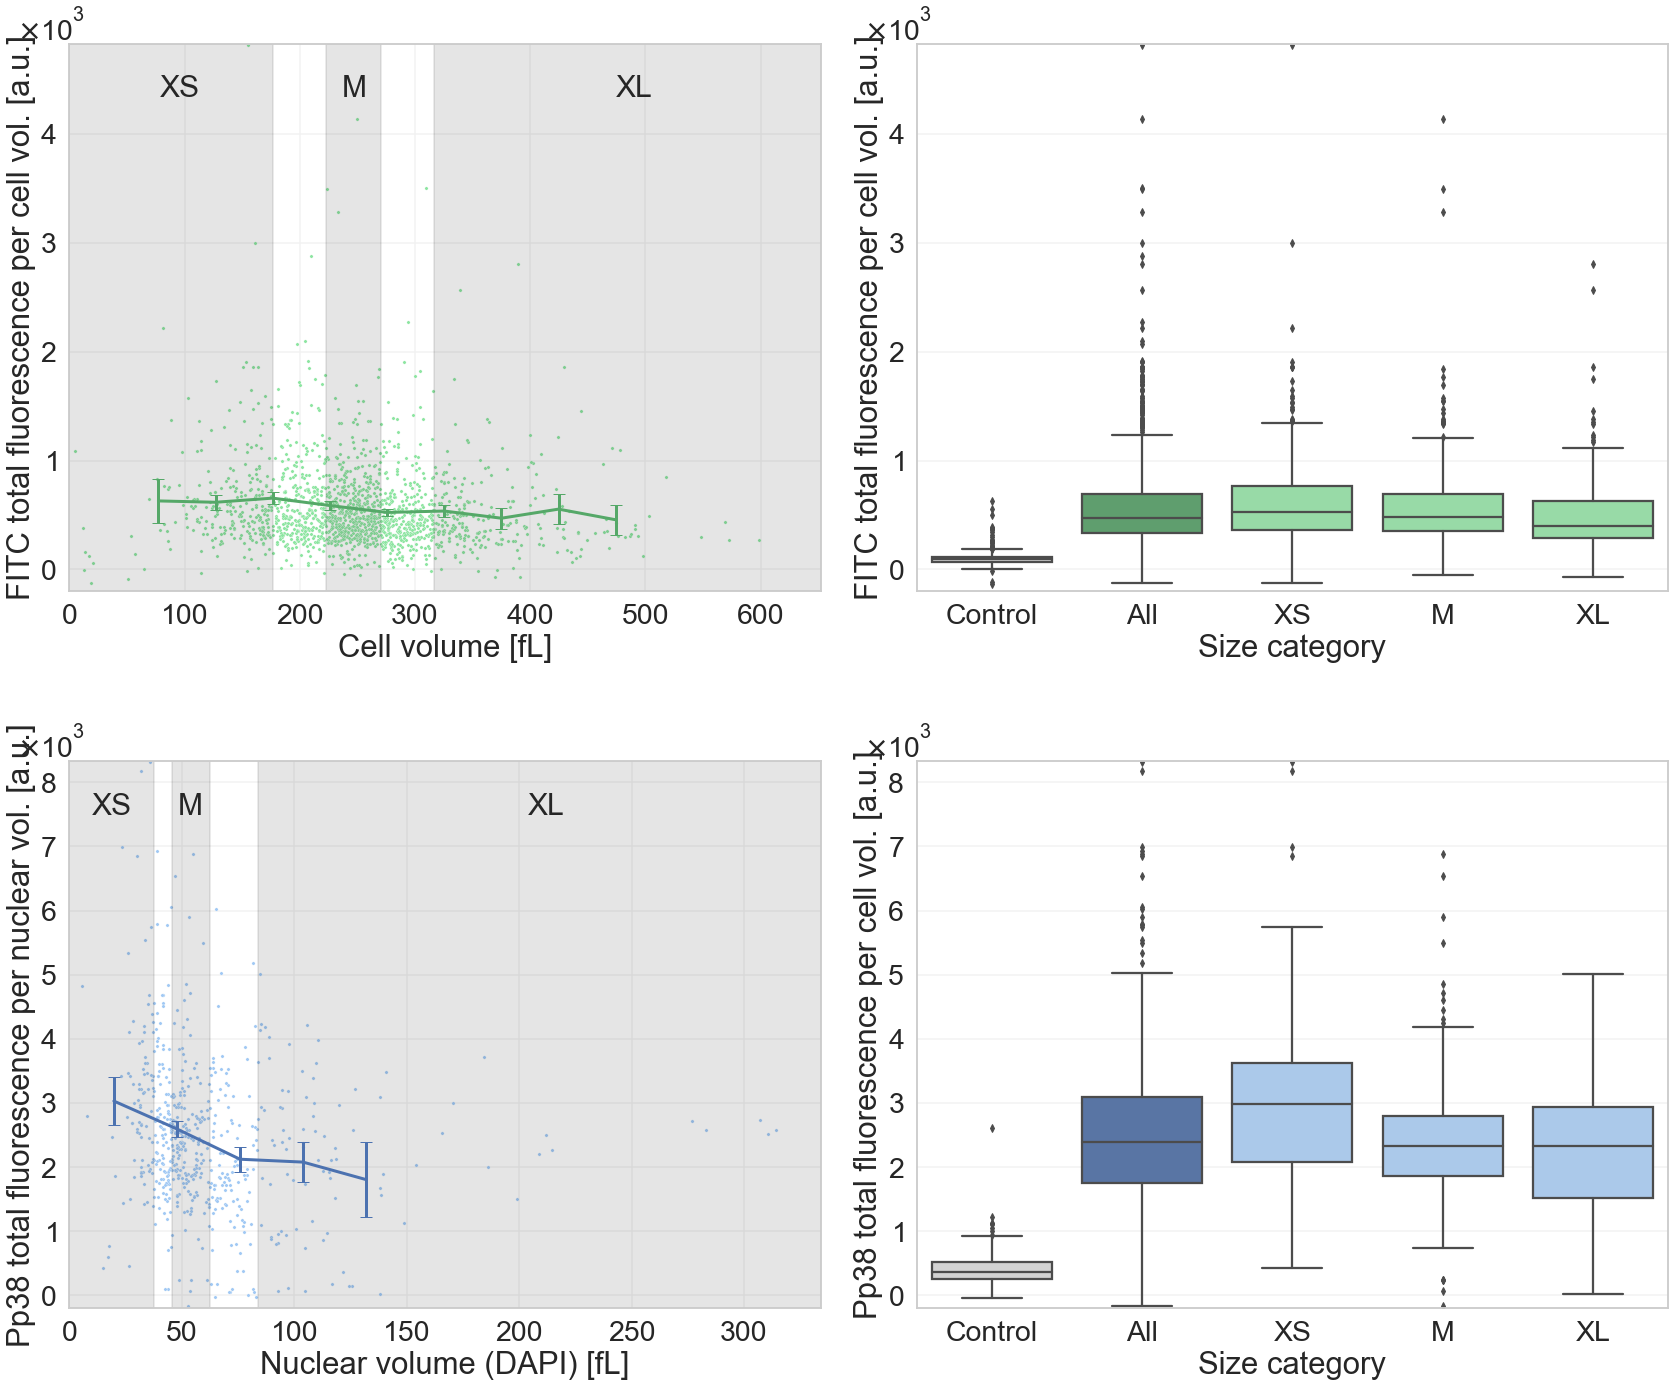

Sample size Fig. 4C&D: 599
Sample size control Fig. 4D: 196
Sample size XS: 90
Sample size M: 179
Sample size XL: 90
ommitted 0 cells with Pp38 concentration higher than 8333.391359201483
Effect size (cohen) All vs. Control: 1.93
Effect size (cohen) XS vs. Control: 3.18
Effect size (cohen) M vs. Control: 2.73
Effect size (cohen) XL vs. Control: 2.67
Effect size (glass) All vs. Control: 7.58
Effect size (glass) XS vs. Control: 9.95
Effect size (glass) M vs. Control: 7.43
Effect size (glass) XL vs. Control: 6.64


In [10]:
# load data from csv
plot_data4a = pd.read_csv(os.path.join(data_dir, 'plot_data4a.csv'))
plot_data4b = pd.read_csv(os.path.join(data_dir, 'plot_data4b.csv'))
plot_data4c = pd.read_csv(os.path.join(data_dir, 'plot_data4c.csv'))
plot_data4d = pd.read_csv(os.path.join(data_dir, 'plot_data4d.csv'))

sns.set_theme(context='talk', font_scale=1.725)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(24,20))

# subplot 1
sns.scatterplot(
    data=plot_data4a,
    x='cell_vol_fl',
    y='FITC_concentration',
    ax = axs[0,0],
    color=sns.color_palette('pastel')[2],
    s=11,
    legend=False
    #scatter_kws={'s':10},
    #x_bins=20
    #hue='size_category'
)
nbins = 12
bins_min_count = 10
xe, ye, std = cca_functions.binned_mean_stats(plot_data4a.cell_vol_fl, plot_data4a.FITC_concentration, nbins, bins_min_count)
axs[0,0].errorbar(xe, ye, yerr=std, capsize=6, lw=3, c=sns.color_palette()[2])
axs[0,0].set_xlabel('Cell volume [fL]')
axs[0,0].set_ylabel('mTOR activity [a.u.]')
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,0].get_yaxis().get_offset_text().set_position((-0.07, 0))
#lower_y_border, upper_y_border = plot_data4b.FITC_concentration.min()-10, plot_data4b.FITC_concentration.max()+10
lower_y_border, upper_y_border = -200, plot_data4a.FITC_concentration.max()+10
height = upper_y_border - lower_y_border
# configure borders for "size blocks"
xs_borders = 0, np.percentile(plot_data4a.cell_vol_fl, 15)
m_borders = np.percentile(plot_data4a.cell_vol_fl, 35), np.percentile(plot_data4a.cell_vol_fl, 65)
xl_borders = np.percentile(plot_data4a.cell_vol_fl, 85), np.percentile(plot_data4a.cell_vol_fl, 85)*2 + 20
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
# add gray rectangles for size categories
axs[0,0].add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.1)
)
axs[0,0].text(0.5*sum(xs_borders)-10, upper_y_border-(upper_y_border//10), 'XS', fontdict={'fontsize':30})
axs[0,0].add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.1)
)
axs[0,0].text(0.5*sum(m_borders)-10, upper_y_border-(upper_y_border//10), 'M', fontdict={'fontsize':30})
axs[0,0].add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.1)
)
axs[0,0].text(0.5*sum(xl_borders)-10, upper_y_border-(upper_y_border//10), 'XL', fontdict={'fontsize':30})
# set x and y limits manually
axs[0,0].set_xlim(0, xl_borders[1])
axs[0,0].set_ylim(lower_y_border, upper_y_border)
#axs[1].set_title('B', fontsize=40, loc='left', pad=10)
#axs[1].set_yscale('log')

# subplot 2
sns.boxplot(
    data=plot_data4b,
    x='size_category',
    y='FITC_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    palette=['lightgray', sns.color_palette()[2]]+ [sns.color_palette('pastel')[2]]*3,
    ax=axs[0,1],
    #size=1
    #inner='quartile'
)
axs[0,1].set_xlabel('Size category')
axs[0,1].set_ylabel('mTOR activity [a.u.]')
#axs[0,1].set_title('C', fontsize=40, loc='left', pad=10)
axs[0,1].set_ylim(lower_y_border, upper_y_border)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,1].get_yaxis().get_offset_text().set_position((-0.07, 0))
#axs[0,1].set_yscale('log')


print(f'Sample size Fig. 4A&B: {len(plot_data4a)}')
print(f'Sample size control Fig. 4B: {len(plot_data4b[plot_data4b.size_category=="Control"])}')
print(f'Sample size XS: {len(plot_data4b[plot_data4b.size_category=="XS"])}')
print(f'Sample size M: {len(plot_data4b[plot_data4b.size_category=="M"])}')
print(f'Sample size XL: {len(plot_data4b[plot_data4b.size_category=="XL"])}')

print(
    f'ommitted {len(plot_data4a[plot_data4a.FITC_concentration>upper_y_border])} cells with FITC concentration '
    f'higher than {upper_y_border}'
     )

print(f'**Effect sizes FITC amount per volume:**')
print(f'Effect size (cohen) All vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4b, "All", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (cohen) XS vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4b, "XS", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (cohen) M vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4b, "M", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (cohen) XL vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4b, "XL", "Control",val_column="FITC_concentration"), 2)}')

print(f'Effect size (glass) All vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4b, "All", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (glass) XS vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4b, "XS", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (glass) M vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4b, "M", "Control",val_column="FITC_concentration"), 2)}')
print(f'Effect size (glass) XL vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4b, "XL", "Control",val_column="FITC_concentration"), 2)}')


# subplot 3
sns.scatterplot(
    data=plot_data4c,
    x='cell_vol_fl',
    y='Pp38_concentration',
    ax = axs[1,0],
    color=sns.color_palette('pastel')[0],
    s=11,
    legend=False
    #scatter_kws={'s':10},
    #x_bins=20
    #hue='size_category'
)
nbins = 11
bins_min_count = 10
xe, ye, std = cca_functions.binned_mean_stats(plot_data4c.cell_vol_fl, plot_data4c.Pp38_concentration, nbins, bins_min_count)
axs[1,0].errorbar(xe, ye, yerr=std, capsize=6, lw=3, c=sns.color_palette()[0])
axs[1,0].set_xlabel('Nuclear volume (DAPI) [fL]')
axs[1,0].set_ylabel('p38 activity [a.u.]')
#lower_y_border, upper_y_border = plot_data3b.FITC_concentration.min()-10, plot_data3b.FITC_concentration.max()+10
lower_y_border, upper_y_border = -200, plot_data4c.Pp38_concentration.max()+10
height = upper_y_border - lower_y_border
# configure borders for "size blocks"
xs_borders = 0, np.percentile(plot_data4c.cell_vol_fl, 15)
m_borders = np.percentile(plot_data4c.cell_vol_fl, 35), np.percentile(plot_data4c.cell_vol_fl, 65)
xl_borders = np.percentile(plot_data4c.cell_vol_fl, 85), np.max(plot_data4c.cell_vol_fl) + 20
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
# add gray rectangles for size categories
axs[1,0].add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.1)
)
axs[1,0].text(0.5*sum(xs_borders)-9, upper_y_border-(upper_y_border//10), 'XS', fontdict={'fontsize':30})
axs[1,0].add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.1)
)
axs[1,0].text(0.5*sum(m_borders)-6, upper_y_border-(upper_y_border//10), 'M', fontdict={'fontsize':30})
axs[1,0].add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.1)
)
axs[1,0].text(0.5*sum(xl_borders)-5, upper_y_border-(upper_y_border//10), 'XL', fontdict={'fontsize':30})
# set x and y limits manually
axs[1,0].set_xlim(0, xl_borders[1])
axs[1,0].set_ylim(lower_y_border, upper_y_border)
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[1,0].get_yaxis().get_offset_text().set_position((-0.07, 0))
#axs[1].set_title('B', fontsize=40, loc='left', pad=10)
#axs[1].set_yscale('log')

# subplot 4
sns.boxplot(
    data=plot_data4d,
    x='size_category',
    y='Pp38_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    palette=['lightgray', sns.color_palette()[0]]+ [sns.color_palette('pastel')[0]]*3,
    ax=axs[1,1],
    #size=1
    #inner='quartile'
)
axs[1,1].set_xlabel('Size category')
axs[1,1].set_ylabel('p38 activity [a.u.]')
#axs[1,1].set_title('C', fontsize=40, loc='left', pad=10)
axs[1,1].set_ylim(lower_y_border, upper_y_border)
axs[1,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[1,1].get_yaxis().get_offset_text().set_position((-0.07, 0))
#axs[1,1].set_yscale('log')

plt.tight_layout()

plt.savefig('../figures/new_fig4/combined_fig4_v4.svg')
plt.savefig('../figures/new_fig4/combined_fig4_v4.png', dpi=300)

plt.show()


print(f'Sample size Fig. 4C&D: {len(plot_data4c)}')
print(f'Sample size control Fig. 4D: {len(plot_data4d[plot_data4d.size_category=="Control"])}')
print(f'Sample size XS: {len(plot_data4d[plot_data4d.size_category=="XS"])}')
print(f'Sample size M: {len(plot_data4d[plot_data4d.size_category=="M"])}')
print(f'Sample size XL: {len(plot_data4d[plot_data4d.size_category=="XL"])}')

print(
    f'ommitted {len(plot_data4c[plot_data4c.Pp38_concentration>upper_y_border])} cells with Pp38 concentration '
    f'higher than {upper_y_border}'
     )

print(f'Effect size (cohen) All vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4d, "All", "Control"), 2)}')
print(f'Effect size (cohen) XS vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4d, "XS", "Control"), 2)}')
print(f'Effect size (cohen) M vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4d, "M", "Control"), 2)}')
print(f'Effect size (cohen) XL vs. Control: {round(cca_functions.calculate_effect_size_cohen(plot_data4d, "XL", "Control"), 2)}')

print(f'Effect size (glass) All vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4d, "All", "Control"), 2)}')
print(f'Effect size (glass) XS vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4d, "XS", "Control"), 2)}')
print(f'Effect size (glass) M vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4d, "M", "Control"), 2)}')
print(f'Effect size (glass) XL vs. Control: {round(cca_functions.calculate_effect_size_glass(plot_data4d, "XL", "Control"), 2)}')

# Figure 5

['AF control at G1-entry' 'AF control, m+b at cytokinesis' 'At G1-entry'
 'Mother+bud at cytokinesis']


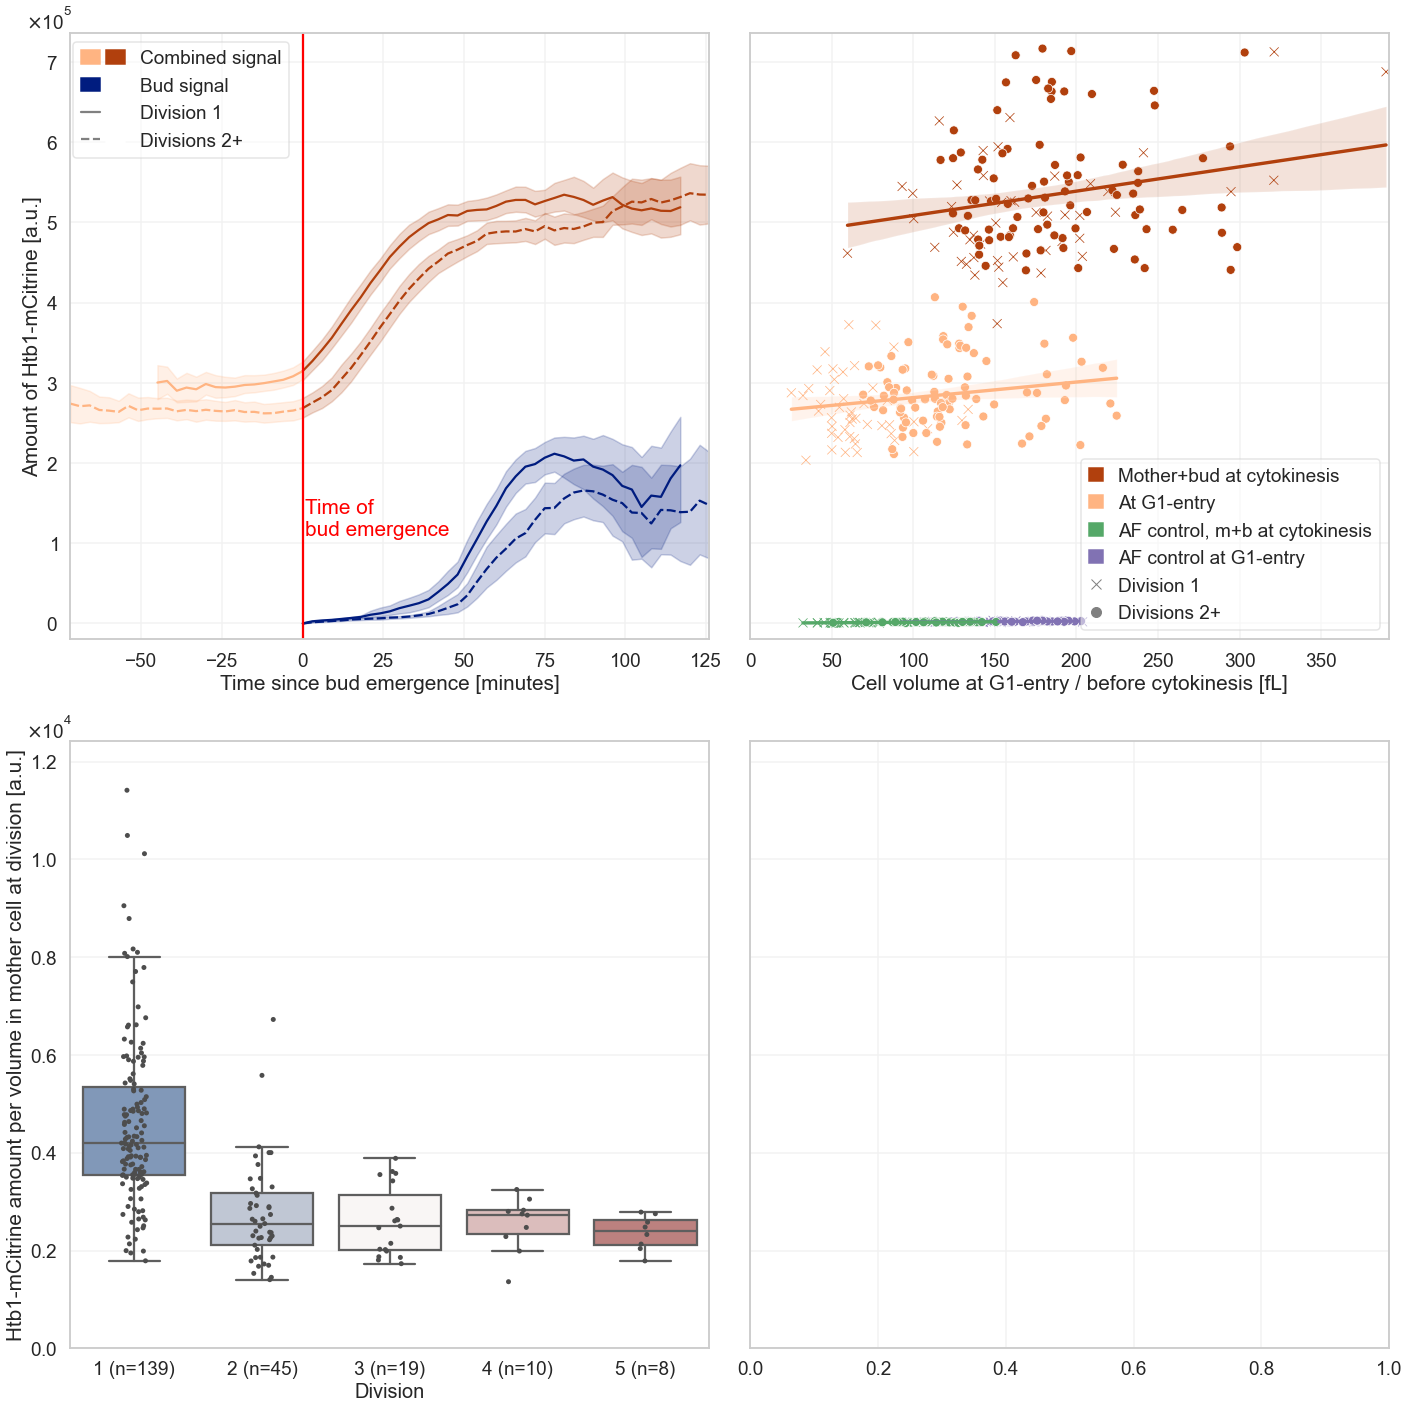

Fig 5A sample size: 137
Fig 5A sample sizes by generation: ['1st ($n_1$=48)' '2+ ($n_2$=89)']
Fig 5B sample size: 215
Fig 5B sample size flu-control: 78
Fig 5B sample size tagged strain: 137
Fig 5C sample size: 221


In [2]:
plot_data5a = pd.read_csv(os.path.join(data_dir, 'plot_data5a_v2.csv'))
plot_data5a_melted = pd.read_csv(os.path.join(data_dir, 'plot_data5a_melted_v2.csv'))
plot_data5b = pd.read_csv(os.path.join(data_dir, 'plot_data5b_v2.csv'))
plot_data5c = pd.read_csv(os.path.join(data_dir, 'plot_data5c.csv'))
sns.set_theme(context='talk', font_scale=1.15)
sns.set_style("whitegrid", {"grid.color": ".95"})
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20), sharey='row')

shared_y_max = plot_data5b.relevant_amount.max()+0.2e5
split_by_gen = True

# subplot 1
if split_by_gen:
    style='Generation'
else:
    style=None
sns.lineplot(
    data=plot_data5a_melted[plot_data5a_melted.centered_time_in_minutes>=0].sort_values('Generation', ascending=False),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    palette=[sns.color_palette('dark')[0],sns.color_palette('dark')[1]],
    style=style,
    ci=95,
    ax=axs[0,0],
    legend=False
)
sns.lineplot(
    data=plot_data5a_melted[
        (plot_data5a_melted.centered_time_in_minutes<=0) &
        (plot_data5a_melted['Method of calculation'] == "Combined signal")
    ].sort_values('Generation', ascending=False),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    palette=[sns.color_palette('pastel')[1]],
    style=style,
    ci=95,
    ax=axs[0,0],
    legend=False
)

axs[0,0].axvline(x=0, color='red')#, label='Time of Bud Emergence')
axs[0,0].text(
    0.7, 1.1e5, "Time of \nbud emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
# custom legend
labels = [
    'Combined signal',
    'Bud signal',
    'Division 1',
    'Divisions 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette('pastel')[1]),
    mpatches.Patch(color=sns.color_palette('dark')[0]),
    mlines.Line2D([], [], color='gray', linestyle='-'),
    mlines.Line2D([], [], color='gray', linestyle='--')
]
handles2 = [
    mpatches.Patch(color=sns.color_palette('dark')[1]),
    mpatches.Patch(color='white'),
    mpatches.Patch(color='white'),
    mpatches.Patch(color='white'),
]
axs[0,0].legend(
    handles=handles+handles2,
    ncol=2,
    labels=['']*4+labels,
    columnspacing=-0.5,
    loc='upper left',
    bbox_to_anchor = (-.01,1),
    framealpha=0.5,
    handlelength=1
)
#plt.setp(axs[0,0].get_legend().get_title(), fontsize='20') 
axs[0,0].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[0,0].set_xlabel("Time since bud emergence [minutes]")
#axs[0,0].set_title('A', fontsize=30, loc='left', pad=10)
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,0].get_yaxis().get_offset_text().set_position((-0.07, 0))
axs[0,0].set_ylim(-0.2e5, shared_y_max)
axs[0,0].set_xlim(
    plot_data5a_melted.centered_time_in_minutes.min(),
    plot_data5a_melted.centered_time_in_minutes.max()
)
#axs[0,0].legend().get_texts()[0].set_text(matplotlib.text.Text(text='test', fontweight=1000))

#subplot 2
# Initialize the figure
custom_colors = [
    sns.color_palette('dark')[1],
    sns.color_palette('pastel')[1],
    sns.color_palette()[4],
    sns.color_palette()[2]
]
sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data5b[plot_data5b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    palette=custom_colors,
    hue="Kind of Measurement new",
    marker='x',
    ax=axs[0,1]
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data5b[plot_data5b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    palette=custom_colors,
    hue="Kind of Measurement new",
    legend=False,
    marker='o',
    ax=axs[0,1]
)
measurements = [
    'Mother+bud at cytokinesis',
    'At G1-entry',
    'AF control, m+b at cytokinesis',
    'AF control at G1-entry'
]

# add regplots in for loop
print(pd.unique(plot_data5b['Kind of Measurement new']))
for idx, measure in enumerate(measurements):
    sns.regplot(
        x="relevant_volume", 
        y="relevant_amount", 
        data=plot_data5b[plot_data5b['Kind of Measurement new']==measure],
        color=custom_colors[idx],
        scatter=False,
        ax=axs[0,1]
    )
labels = [
    'Division 1',
    'Divisions 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette('dark')[1]),
    mpatches.Patch(color=sns.color_palette('pastel')[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[4]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
axs[0,1].legend(
    handles=handles,
    labels=measurements+labels, 
    loc='lower right',
    #bbox_to_anchor = (1,0),
    framealpha=0.5,
    handlelength=0.75
)
axs[0,1].set_ylabel("Amount of Htb1-mCitrine [a.u.]")
axs[0,1].set_xlabel('Cell volume at G1-entry / before cytokinesis [fL]')
# format y-axis
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[0,1].get_yaxis().get_offset_text().set_position((-0.07, 0))
# format x-axis
axs[0,1].set_xlim(0, plot_data5b.relevant_volume.max()+2)
axs[0,1].set_ylim(-0.2e5, shared_y_max)
#axs[0,1].set_title('B', fontsize=30, loc='left', pad=10)

sns.boxplot(
    data=plot_data5c,
    x='x_label',
    y='mCitrine_corrected_concentration',
    palette='vlag',
    fliersize=0,
    ax=axs[1,0]
)

#add stripplot on top
sns.stripplot(
    data=plot_data5c,
    x='x_label',
    y='mCitrine_corrected_concentration',
    color=".3",
    ax=axs[1,0]
)

# switch to scientific number format on y-Axis and move text
axs[1,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
axs[1,0].get_yaxis().get_offset_text().set_position((-0.07,0))

# Rename axes and set title
axs[1,0].set_ylabel("Htb1-mCitrine amount per volume in mother cell at division [a.u.]")#, fontsize=20)
axs[1,0].set_xlabel("Division", fontsize=20)
#axs[1,0].set_title(f"Concentration by Generation (n={len(plot_data5c)})", fontsize=25) # changed this from 30 to 25 compared to 5B
axs[1,0].set_ylim(0, plot_data5c.mCitrine_corrected_concentration.max()+0.1e4)

plt.tight_layout()

#plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'combined_fig5_v4.png'), dpi=300)
#plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'combined_fig5_v4.svg'))

plt.show()
sample_size5a = len(plot_data5a[['position', 'Cell_ID', 'file', 'generation_num']].drop_duplicates())
sample_size5b = len(plot_data5b)
print(f'Fig 5A sample size: {sample_size5a}')
print(f'Fig 5A sample sizes by generation: {plot_data5a_melted.Generation.unique()}')
print(f"Fig 5B sample size: {int(sample_size5b/2)}")
print(f'Fig 5B sample size flu-control: {len(plot_data5b[plot_data5b.selection_subset==1])//2}')
print(f'Fig 5B sample size tagged strain: {len(plot_data5b[plot_data5b.selection_subset==0])//2}')
print(f'Fig 5C sample size: {len(plot_data5c)}')

In [ ]:
plot_data5a_melted[plot_data5a_melted.centered_time_in_minutes<=0]

# Load raw data to create Figure 3

## generate Act1-cellpose vs. PC-YeaZ Volume plot

In [ ]:
phase_contr_yeaz_data = pd.read_csv(os.path.join(data_dir, 'SegmPhaseContr_YeaZ_AllPos_acdc_output.csv'))
cellpose_act1_data = pd.read_csv(os.path.join(data_dir, 'SegmACT1_Cellpose_AllPos_acdc_output.csv'))
merged_vol_data = pd.merge(
    phase_contr_yeaz_data,
    cellpose_act1_data,
    on=['Position_n', 'Cell_ID'],
    suffixes=('_yeaz', '_cellpose')
)

In [ ]:
plt.figure(figsize=(10,10))
fig = sns.lmplot(
    data=merged_vol_data,
    x='cell_vol_fl_yeaz',
    y='cell_vol_fl_cellpose',
    hue='relationship_cellpose',
    height=7.5,
    legend=False
)
ax = plt.gca()
labels = [
    'Mother cells',
    'Buds & daughter cells'
]
handles = [
    mlines.Line2D([], [], color=sns.color_palette()[0], marker='o', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color=sns.color_palette()[1], marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_xlabel('Cell Volume Phase Contrast + YeaZ [fL]')
ax.set_ylabel('Cell Volume Act1 signal + cellpose [fL]')
plt.show()
#merged_vol_data.to_csv(os.path.join(data_dir, 'plot_data3a.csv'), index=False)

# Load raw data to create Figure 4

## configuration - p38 data

In [ ]:
stem_data = pd.read_csv(os.path.join(data_dir, 'p38_AB_AllPos_acdc_output.csv'))
# configure borders for "size blocks"
xs_borders = 0, np.percentile(stem_data.cell_vol_fl, 15)
m_borders = np.percentile(stem_data.cell_vol_fl, 35), np.percentile(stem_data.cell_vol_fl, 65)
xl_borders = np.percentile(stem_data.cell_vol_fl, 85), np.max(stem_data.cell_vol_fl) + 20
stem_data['Pp38_concentration'] = stem_data['Pp38_amount_autoBkgr_zSlice'] / stem_data['cell_vol_fl']

## generate scatter plot with "size blocks" - p38 data --> format in combined plot

In [ ]:
plt.subplots(figsize=(10,10))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.scatterplot(
    data=stem_data,
    x='cell_vol_fl',
    y='Pp38_concentration',
    #hue='size_category'
)
ax.set_xlabel('HSC Nuclear Volume [fL]')
ax.set_ylabel('Mean intensity Pp38 [a.u.]')
lower_y_border, upper_y_border = stem_data.Pp38_concentration.min()-10, stem_data.Pp38_concentration.max()+10
height = upper_y_border - lower_y_border
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
ax.add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xs_borders)-20, upper_y_border-50, 'XS', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(m_borders)-20, upper_y_border-50, 'M', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xl_borders)-20, upper_y_border-50, 'XL', fontdict={'fontsize':30})
"""
plt.savefig(
    '../figures/stemcell_scatter_v1.pdf',
    dpi=300
)
"""
plt.show()
#stem_data.to_csv(os.path.join(data_dir, 'plot_data4c.csv'), index=False)

## generate box plots by size category - p38 data

In [ ]:
stem_bkgr_data = pd.read_csv(os.path.join(data_dir, 'p38_control_AllPos_acdc_output.csv'))
stem_bkgr_data['Pp38_concentration'] = stem_bkgr_data['Pp38_amount_autoBkgr_zSlice'] / stem_bkgr_data['cell_vol_fl']
def generate_size_str(x):
    if x>=0 and x<=xs_borders[1]:
        return 'XS'
    elif x>=m_borders[0] and x<=m_borders[1]:
        return 'M'
    elif x>=xl_borders[0]:
        return 'XL'
    else:
        return 'rest'
all_data = stem_data.copy()
all_data['size_category'] = 'All'
stem_data['size_category'] = stem_data.cell_vol_fl.apply(generate_size_str)
stem_bkgr_data['size_category'] = 'Control'
box_data = pd.concat([all_data, stem_data[stem_data.size_category!='rest'], stem_bkgr_data], ignore_index=True)

In [ ]:
sns.set_theme(context='talk', style='darkgrid')
plt.figure(figsize=(10,10))
ax = sns.boxplot(
    data=box_data,
    x='size_category',
    y='Pp38_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    color=sns.color_palette()[0]
    #inner='quartile'
)
ax.set_xlabel('Size Category')
ax.set_ylabel('Mean intensity Pp38 [a.u.]')
"""
plt.savefig(
    '../figures/stemcell_violin_v1.pdf',
    dpi=300
)
"""
plt.show()
#box_data.to_csv(os.path.join(data_dir, 'plot_data4d.csv'), index=False)

## configuration - FITC data

In [ ]:
stem_data = pd.read_csv(os.path.join(data_dir, 'stemcell_data.csv'))
# configure borders for "size blocks"
xs_borders = 0, np.percentile(stem_data.cell_vol_fl, 15)
m_borders = np.percentile(stem_data.cell_vol_fl, 35), np.percentile(stem_data.cell_vol_fl, 65)
xl_borders = np.percentile(stem_data.cell_vol_fl, 85), np.percentile(stem_data.cell_vol_fl, 85) * 2 + 20
# In Fig. 3B very small cells are assumed to be imaging fragments, very large cells missed Segmentation errors
min_vol, max_vol = 0, xl_borders[0]*2
stem_selection_indices = np.logical_and(stem_data.cell_vol_fl>min_vol, stem_data.cell_vol_fl<max_vol)
stem_data = stem_data[stem_selection_indices]
stem_data['FITC_concentration'] = stem_data['FITC_amount_autoBkgr_zSlice'] / stem_data['cell_vol_fl']

## generate scatter plot with "size blocks"

In [ ]:
plt.subplots(figsize=(10,10))
sns.set_theme(context='talk', style='darkgrid')
ax = sns.scatterplot(
    data=stem_data,
    x='cell_vol_fl',
    y='FITC_concentration',
    color=sns.color_palette()[2]
    #hue='size_category'
)
ax.set_xlabel('HSC Volume [fL]')
ax.set_ylabel('Mean intensity FITC [a.u.]')
lower_y_border, upper_y_border = stem_data.FITC_concentration.min()-10, stem_data.FITC_concentration.max()+10
height = upper_y_border - lower_y_border
xs_width = xs_borders[1]-xs_borders[0]
m_width = m_borders[1]-m_borders[0]
xl_width = xl_borders[1]-xl_borders[0]
ax.add_patch(
    patches.Rectangle((xs_borders[0], lower_y_border), xs_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(xs_borders)-20, upper_y_border-50, 'XS', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((m_borders[0], lower_y_border), m_width, height, color='black', alpha=0.2)
)
plt.text(0.5*sum(m_borders)-20, upper_y_border-50, 'M', fontdict={'fontsize':30})
ax.add_patch(
    patches.Rectangle((xl_borders[0], lower_y_border), xl_width, height, color='black', alpha=0.2)
)
ax.set_xlim(0, xl_borders[1])
plt.text(0.5*sum(xl_borders)-20, upper_y_border-50, 'XL', fontdict={'fontsize':30})
"""
plt.savefig(
    '../figures/stemcell_scatter_v1.pdf',
    dpi=300
)
"""
plt.show()
#stem_data.to_csv(os.path.join(data_dir, 'plot_data4a.csv'), index=False)

## generate box plots by size category

In [ ]:
stem_bkgr_data = pd.read_csv(os.path.join(data_dir, 'stemcell_bkgr_data.csv'))
stem_bkgr_data['FITC_concentration'] = stem_bkgr_data['FITC_amount_autoBkgr_zSlice'] / stem_bkgr_data['cell_vol_fl']
def generate_size_str(x):
    if x>=0 and x<=xs_borders[1]:
        return 'XS'
    elif x>=m_borders[0] and x<=m_borders[1]:
        return 'M'
    elif x>=xl_borders[0]:
        return 'XL'
    else:
        return 'rest'
all_data = stem_data.copy()
all_data['size_category'] = 'All'
stem_data['size_category'] = stem_data.cell_vol_fl.apply(generate_size_str)
stem_bkgr_data['size_category'] = 'Control'
box_data = pd.concat([all_data, stem_data[stem_data.size_category!='rest'], stem_bkgr_data], ignore_index=True)

In [ ]:
sns.set_theme(context='talk', style='darkgrid')
plt.figure(figsize=(10,10))
ax = sns.boxplot(
    data=box_data,
    x='size_category',
    y='FITC_concentration',
    order=["Control", "All", "XS", "M", "XL"],
    color=sns.color_palette()[2]
    #inner='quartile'
)
ax.set_xlabel('Size Category')
ax.set_ylabel('Mean intensity FITC [a.u.]')
"""
plt.savefig(
    '../figures/stemcell_violin_v1.pdf',
    dpi=300
)
"""
plt.show()
#box_data.to_csv(os.path.join(data_dir, 'plot_data4b.csv'), index=False)

# Load raw data to perform calculations for Figure 5
(same as in downstream-notebook but with fixed data selection)

## calculate downstream data based on raw image data

In [ ]:
data_dirs, positions = (
    [
        '../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_labeled',
        '../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_flu_control_labeled'
    ],
    [
        ['Position_2', 'Position_3', 'Position_4', 'Position_5', 'Position_8'],
        ['Position_1', 'Position_3']
    ]
)
file_names = [os.path.split(path)[-1] for path in data_dirs]
image_folders = [[os.path.join(data_dir, pos_str, 'Images') for pos_str in pos_list] for pos_list, data_dir in zip(positions, data_dirs)]
# determine available channels based on first(!) position.
# Warn user if one or more of the channels are not available for some positions
first_pos_dir = os.path.join(data_dirs[0], positions[0][0], 'Images')
first_pos_files = myutils.listdir(first_pos_dir)
channels, warn = cca_functions.find_available_channels(first_pos_files, first_pos_dir)

In [ ]:
overall_df, is_timelapse_data, is_zstack_data = cca_functions.calculate_downstream_data(
    file_names,
    image_folders,
    positions,
    channels, 
    force_recalculation=False
)
#overall_df.to_csv(os.path.join(data_dir, 'raw_downstream_data_fig4_v2.csv'), index=False)

## Alternatively load raw downstream data

In [ ]:
data_dir = os.path.join('..', 'data', 'paper_plot_data')
overall_df = pd.read_csv(os.path.join(data_dir, 'raw_downstream_data_fig5_v2.csv'))

## Perform calculations generally needed for Figure 5

In [ ]:
overall_df_with_rel = cca_functions.calculate_relatives_data(overall_df, channels)
# If working with timelapse data build dataframe grouped by phases
group_cols = [
    'Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
    'max_frame_pos', 'selection_subset', 'max_t'
]
# calculate data grouped by phase only in the case, that timelapse data is available
if is_timelapse_data:
    phase_grouped = cca_functions.calculate_per_phase_quantities(overall_df_with_rel, group_cols, channels)
    # append phase-grouped data to overall_df
    overall_df_with_rel = overall_df_with_rel.merge(
        phase_grouped,
        how='left',
        on=group_cols
    )

In [ ]:
overall_df_with_rel.shape, phase_grouped.shape

## perform calculations for time plot (Fig. 5A)

In [ ]:
# some configurations
# frame interval of video
frame_interval_minutes = 3
# quantiles of complete cell cycles (wrt phase lengths) to exclude from analysis 
# (not used, keep this for potential later use)
down_q, upper_q = 0, 1
# minimum number of cell cycles contributing to the mean+CI curve:
min_no_of_ccs = 10
# determine if you want to split the plot by generation
split_by_gen = True
# wether to scale to 0/1 or not
scale_data = False

# select needed cols from overall_df_with_rel to not end up with too many columns
needed_cols = [
    'selection_subset', 'position', 'Cell_ID', 'cell_cycle_stage', 'generation_num', 'frame_i',
    'mCitrine_corrected_amount', 'mCitrine_corrected_amount_rel', 
    'file', 'relationship', 'relative_ID', 'phase_length', 'phase_begin', 'gui_mCitrine_amount_autoBkgr'
]
filter_idx = np.logical_and(overall_df_with_rel['complete_cycle'] == 1, overall_df_with_rel.selection_subset==0)
plot_data5a = overall_df_with_rel.loc[filter_idx, needed_cols].copy()
# calculate the time the cell already spent in the current frame at the current timepoint
plot_data5a['frames_in_phase'] = plot_data5a['frame_i'] - plot_data5a['phase_begin'] + 1
# calculate the time to the next (for G1 cells) and from the last (for S cells) G1/S transition  
plot_data5a['centered_frames_in_phase'] = plot_data5a.apply(
    lambda x: x.loc['frames_in_phase'] if\
    x.loc['cell_cycle_stage']=='S' else\
    x.loc['frames_in_phase']-1-x.loc['phase_length'],
    axis=1
)
# calculate combined signal and the "Pool, Phase ID" for the legend
# plot_data5a at this point only contains relationship==mother, 
# as generation_num==0 and relationship==bud are filtered out (incomplete cycle, cycles start with G1)
plot_data5a['Combined signal'] = plot_data5a.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
plot_data5a['Bud signal'] = plot_data5a.apply(
    lambda x: x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else 0,
    axis=1
)
# scale data if needed
if scale_data:
    maximum = max(
        plot_data5a['Combined signal'].max(), 
        plot_data5a['Bud signal'].max()
    )
    plot_data5a['Combined signal'] /= maximum
    plot_data5a['Bud signal'] /= maximum
# calculate min and max centered times per generation to eliminate up to a percentile
# (not used, as upper_q and lower_q are set to 100/0 respectively)
plot_data5a['min_centered_frames'] = plot_data5a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'min'
)
plot_data5a['max_centered_frames'] = plot_data5a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'max'
)
min_and_max = plot_data5a.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
).agg(
    min_centered = ('min_centered_frames', 'first'),
    max_centered = ('max_centered_frames', 'first')
).reset_index()
min_val, max_val = np.quantile(
    min_and_max.min_centered, down_q
) * frame_interval_minutes, np.quantile(
    min_and_max.max_centered, upper_q
) * frame_interval_minutes
# perform selection (won't change anything if upper and lower are 100 and 0 respectively)
selection_indices = np.logical_and(
    plot_data5a.min_centered_frames*frame_interval_minutes>=min_val, 
    plot_data5a.max_centered_frames*frame_interval_minutes<=max_val
)
plot_data5a = plot_data5a[selection_indices]

# calculate centered time in minutes
plot_data5a['centered_time_in_minutes'] = plot_data5a.centered_frames_in_phase * frame_interval_minutes

# group dataframe to calculate sample sizes per generation
standard_grouped = plot_data5a.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
).agg('count').reset_index()
plot_data5a['Generation'] = plot_data5a.apply(
    lambda x: f'1st ($n_1$={len(standard_grouped[standard_grouped.generation_num==1])})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={len(standard_grouped[standard_grouped.generation_num>1])})',
    axis=1
)
if split_by_gen:
    g_cols = ['centered_frames_in_phase', 'Generation']
else:
    g_cols = 'centered_frames_in_phase'
plot_data5a['contributing_ccs_at_time'] = plot_data5a.groupby(g_cols).transform('count')['selection_subset']
plot_data5a = plot_data5a[plot_data5a.contributing_ccs_at_time >= min_no_of_ccs]

# finally prepare data for plot (use melt for multiple lines)
sample_size_5a = len(standard_grouped)
avg_cell_cycle_length = round(standard_grouped.loc[:,'centered_time_in_minutes'].mean())*frame_interval_minutes
cols_to_plot = ['Bud signal', 'Combined signal']
index_cols = [col for col in plot_data5a.columns if col not in cols_to_plot]
plot_data5a_melted = pd.melt(
    plot_data5a, index_cols, var_name='Method of calculation'
).sort_values('Method of calculation')
data_dir = os.path.join('..', 'data', 'paper_plot_data')
# save preprocessed data for Fig. 5A
#plot_data5a_melted.to_csv(os.path.join(data_dir, 'plot_data5a_melted_v2.csv'), index=False)
#plot_data5a.to_csv(os.path.join(data_dir, 'plot_data5a_v2.csv'), index=False)

## generate time plot (Fig. 5A)

In [ ]:
# plot the data, comment out "style" argument to not make difference between generations
sns.set_theme(style="darkgrid", font_scale=1.6)
f, ax = plt.subplots(figsize=(15, 12))
if split_by_gen:
    style='Generation'
else:
    style=None
ax = sns.lineplot(
    data=plot_data5a_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of calculation',
    style=style,
    #style='position',
    ci=95
)
ax.axvline(x=0, color='red')#, label='Time of Bud Emergence')
ax.text(
    0.5, 100000, "Time of \nBud Emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
ax.legend(
    #title=f'Avg CC Length: {avg_cell_cycle_length} min, n = {sample_size_5a}', 
    fancybox=True,
    labelspacing=0.5,
    handlelength=1.5,
    loc = 'upper left'
)
ax.set_ylabel("Total amount of Htb1-mCitrine corrected by background [a.u.]", fontsize=20)
ax.set_xlabel("Time in phase relative to G1/S transition [minutes]", fontsize=20)
ax.set_title("Corrected Htb1-mCitrine Amount during Cell Cycle Progression", fontsize=30)
plt.tight_layout()
"""
plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'mCitrine_over_time_by_gen_v6.svg'))
plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'mCitrine_over_time_by_gen_v6.png'),dpi=300)
"""
plt.show()

## perform calculations for volume at birth plot (Fig 5B)

In [ ]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
needed_cols = [
    'Cell_ID', 'generation_num', 'position', 'file', 'cell_cycle_stage', 'selection_subset', 
    'phase_volume_at_beginning', 'phase_volume_at_end', 'phase_mCitrine_amount_at_beginning',
    'phase_mCitrine_combined_amount_at_end', 'phase_combined_volume_at_end'
]
plot_data5b = phase_grouped.loc[phase_grouped.all_complete==1, needed_cols]
scale_data = False

In [ ]:
plot_data5b['relevant_volume'] = plot_data5b.apply(
    lambda x: x.loc['phase_volume_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_combined_volume_at_end'],
    axis=1
)
plot_data5b['relevant_amount'] = plot_data5b.apply(
    lambda x: x.loc['phase_mCitrine_amount_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_mCitrine_combined_amount_at_end'],
    axis=1
)
# defining a function to generate entries for the figure legend 
# (assuming that selection_subset>0 is the autofluorescence control of the experiment)
def calc_legend_entry(x):
    if x.loc['selection_subset'] == 0:
        if x.loc['cell_cycle_stage']=='G1':
            return 'At G1-entry'
        else:
            return 'Mother+bud at cytokinesis'
    else:
        if x.loc['cell_cycle_stage']=='G1':
            return 'AF control at G1-entry'
        else:
            return 'AF control, m+b at cytokinesis'
        
plot_data5b['Kind of Measurement new'] = plot_data5b.apply(
    calc_legend_entry,
    axis=1
)
plot_data5b['Generation'] = plot_data5b.apply(
    lambda x: f'1st ($n_1$={int(len(plot_data5b[plot_data5b.generation_num==1])/2)})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={int(len(plot_data5b[plot_data5b.generation_num>1])/2)})',
    axis=1
)
if scale_data:
    maximum = plot_data5b['relevant_amount'].max()
    plot_data5b['relevant_amount'] /= maximum
sample_size_5b = len(plot_data5b)
data_dir = os.path.join('..', 'data', 'paper_plot_data')
#plot_data5b.to_csv(os.path.join(data_dir, 'plot_data5b_v2.csv'), index=False)

## generate volume at birth plot (Fig 5B)

In [ ]:
#plot_data5b = plot_data5b[plot_data5b.selection_subset==1]
sns.set_theme(style="whitegrid", font_scale=1.6)
# Initialize the figure
sns.lmplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data5b.sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    #style="generation_num",
    #row="selection_subset",
    #sharex=False,
    height=10,
    aspect=1.1,
    scatter=False
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data5b[plot_data5b.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='x'
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data5b[plot_data5b.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o'
)

#g._legend.set_title('Kind of Measurement')
ax = plt.gca()
#ax.set(yscale="log2")
#ax.set_yscale('log', basey=2)
#ax.set_xscale('log', basex=10)
labels = [
    'Single cell at G1-entry',
    'Mother&bud at cytokinesis',
    'Af control, single cell at G1-entry',
    'Af control, combined mother&bud at cytokinesis',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_ylabel("Amount of Htb1-mCitrine in Cell(s) [a.u.]", fontsize=20)
ax.set_xlabel("Volume at G1-entry / Combined Volume Before Cytokinesis [fL]", fontsize=20)
ax.set_title(f"Volume at G1-entry vs Htb1-mCitrine Amount (n={int(sample_size_5b/2)})", fontsize=30)
# format y-axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))
# format x-axis
ax.set_xlim(0, plot_data5b.relevant_volume.max()+20)
plt.tight_layout()
"""
plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'mCitrine_at_birth_and_cytokinesis_v6.png'), dpi=300)
plt.savefig(os.path.join('..', 'figures', 'new_fig5', 'mCitrine_at_birth_and_cytokinesis_v6.svg'))
"""
plt.show()
print(f'sample size flu-control: {len(plot_data5b[plot_data5b.selection_subset==1])//2}')
print(f'sample size tagged strain: {len(plot_data5b[plot_data5b.selection_subset==0])//2}')

## Perform calculations for Figure 5C: Filter for cells at birth (first frame into G1 of each mother cell)

In [ ]:
# will show up at x=1 --> later mother cells at their own birth
mothers_at_birth = overall_df_with_rel[
    (overall_df_with_rel.generation_num==1) & 
    (overall_df_with_rel.cell_cycle_stage=='G1') & 
    (overall_df_with_rel.frame_i==overall_df_with_rel.phase_begin) & 
    (overall_df_with_rel.is_history_known) &
    (overall_df_with_rel.file=='MIA_KC_htb1_mCitrine_labeled') &
    (~overall_df_with_rel.is_cell_excluded)
]
# will show up at x>1 --> mother cells now dividing from their own daughter cell the first (gen=2), second (gen=3),... time
mothers_at_division = overall_df_with_rel[
    (overall_df_with_rel.generation_num>1) & 
    (overall_df_with_rel.cell_cycle_stage=='G1') & 
    (overall_df_with_rel.frame_i==overall_df_with_rel.division_frame_i) & 
    (overall_df_with_rel.is_history_known) &
    (overall_df_with_rel.file=='MIA_KC_htb1_mCitrine_labeled') &
    (~overall_df_with_rel.is_cell_excluded)
]

In [ ]:
mothers_df = pd.concat([mothers_at_division,mothers_at_birth], ignore_index=True)
mothers_df['pos_cell_id'] = mothers_df.apply(lambda x: f'cell_{x.loc["Cell_ID"]}_{x.loc["position"]}', axis=1)
# calculate number of cells per generation
gen_counter = Counter(mothers_df.generation_num)
mothers_df['x_label'] = mothers_df.generation_num.apply(lambda x: f'{int(x)} (n={gen_counter[x]})')
mothers_df = mothers_df[['frame_i', 'Cell_ID', 'file', 'position', 'x_label', 'mCitrine_corrected_amount', 'mCitrine_corrected_concentration']].sort_values('x_label')
#mothers_df.to_csv(os.path.join(data_dir, 'plot_data5c.csv'), index=False)

## Generate Figure 5C

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1.6)
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(
    data=mothers_df,
    x='x_label',
    y='mCitrine_corrected_concentration',
    palette='vlag',
    fliersize=0,
    ax=ax
)

#add stripplot on top
sns.stripplot(
    data=mothers_df,
    x='x_label',
    y='mCitrine_corrected_concentration',
    color=".3",
    ax=ax
)

# switch to scientific number format on y-Axis and move text
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))

# Rename axes and set title
ax.set_ylabel("Htb1-mCitrine amount per volume in mother cell at division [a.u.]", fontsize=20)
ax.set_xlabel("Generation", fontsize=20)
ax.set_title(f"Amount per Volume by Generation (n={len(mothers_df)})", fontsize=25) # changed this from 30 to 25 compared to 5B
ax.set_ylim(0, mothers_df.mCitrine_corrected_concentration.max()+0.1e4)

# save and show
plt.tight_layout()
#plt.savefig('../figures/generation_plot_v5.svg')#, dpi=300)
#plt.savefig('../figures/generation_plot_v5.png', dpi=300)
plt.show()

### Identify outliers and perform quick inspection to exclude possibility of Segmentation errors

In [ ]:
outliers = mothers_df.loc[mothers_df['mCitrine_corrected_concentration'] > 1e4][['Cell_ID', 'frame_i', 'file', 'position']]
data_path = f'../data/acdc_test_data/TimeLapse_2D/MIA_KC_htb1_mCitrine_labeled'
for idx, line in outliers.iterrows():
    print(line)# if 'is' in str(v)])
    pos_dir = f'{data_path}/{line["position"]}/Images'
    channel_data, seg_mask, cc_data, metadata, cc_props = cca_functions._load_files(pos_dir, ['phase_contr'])
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Phase Contrast')
    plt.imshow(channel_data[line["frame_i"]])
    plt.subplot(122)
    plt.title('Outlier_cell')
    plt.imshow(seg_mask[line["frame_i"]]==line["Cell_ID"])
    plt.show()